# Chapitre V
## Partie obligatoire

### V.1 Data Analysis

#### reading csv files

In [113]:
import csv
#train = csv.reader("resources/dataset_train.csv", dialect='excel')


In [216]:
data = []
with open("resources/dataset_train.csv") as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        data.append(row)
data[0:2]

[OrderedDict([('Index', '0'),
              ('Hogwarts House', 'Ravenclaw'),
              ('First Name', 'Tamara'),
              ('Last Name', 'Hsu'),
              ('Birthday', '2000-03-30'),
              ('Best Hand', 'Left'),
              ('Arithmancy', '58384.0'),
              ('Astronomy', '-487.88608595139016'),
              ('Herbology', '5.727180298550763'),
              ('Defense Against the Dark Arts', '4.8788608595139005'),
              ('Divination', '4.7219999999999995'),
              ('Muggle Studies', '272.0358314131986'),
              ('Ancient Runes', '532.4842261151226'),
              ('History of Magic', '5.231058287281048'),
              ('Transfiguration', '1039.7882807428462'),
              ('Potions', '3.7903690663529614'),
              ('Care of Magical Creatures', '0.7159391270136213'),
              ('Charms', '-232.79405'),
              ('Flying', '-26.89')]),
 OrderedDict([('Index', '1'),
              ('Hogwarts House', 'Slytherin'),
        

In [115]:
# extract column names
colnames = data[0].keys()
colnames

odict_keys(['Index', 'Hogwarts House', 'First Name', 'Last Name', 'Birthday', 'Best Hand', 'Arithmancy', 'Astronomy', 'Herbology', 'Defense Against the Dark Arts', 'Divination', 'Muggle Studies', 'Ancient Runes', 'History of Magic', 'Transfiguration', 'Potions', 'Care of Magical Creatures', 'Charms', 'Flying'])

In [221]:
data_column = {}
for col in colnames:
    col_values = []
    for dic in data:
        try:
            col_values.append(float(dic[col]))
        except ValueError :
            col_values.append(str(dic[col]))
    data_column[col] = col_values
data_column["Ancient Runes"][0:10]

[532.4842261151226,
 367.7603030171392,
 602.5852838484592,
 523.9821331934736,
 599.3245143172293,
 396.20180391410247,
 583.7424423327342,
 439.3514157413572,
 567.8424015938325,
 341.47560564416693]

#### compute values for pd.describe() function

### standalone functions

#### standalone max

In [117]:
def isnumeric(entry):
    try:
        float(entry)
        return True
    except ValueError:
        return False

In [118]:
def muggle_max(column):
    result = column[0]
    for entry in column:
        if isnumeric(entry):
            if entry > result:
                result = entry
    return result

#### standalone min

In [119]:
def muggle_min(column):
    result = column[0]
    for entry in column:
        if isnumeric(entry):
            if entry < result:
                result = entry
    return result

#### standalone count

In [120]:
def muggle_count(column):
    result = sum(isinstance(num, float) for num in column)
    return result

#### standalone std

In [121]:
def muggle_std(column, mean, count):
    import math
    numerator = 0
    for entry in column:
        if isnumeric(entry):
            numerator += (entry - mean)**2
        denom = count - 1
        std = math.sqrt(numerator / denom)
    return std

#### standalone mean

In [122]:
def muggle_mean(column):
    count = 

SyntaxError: invalid syntax (<ipython-input-122-d5d1766fb42b>, line 2)

In [123]:
describe = {k: [] for k in ["count", "mean", "std", "min","25%", "50%", "75%", "max"]}
describe

{'25%': [],
 '50%': [],
 '75%': [],
 'count': [],
 'max': [],
 'mean': [],
 'min': [],
 'std': []}

#### count()

In [124]:
for colname in data_column:
    if colname in ["Hogwarts House", "First Name", "Last Name", "Birthday", "Best Hand"]:
        count = "Not numeric"
    else:
        # filter out None values from counting
        count = muggle_count(data_column[colname])
        # count = len(data_column[colname]) # this counts up empty values as well
    describe["count"].append(count)
describe

{'25%': [],
 '50%': [],
 '75%': [],
 'count': [1600,
  'Not numeric',
  'Not numeric',
  'Not numeric',
  'Not numeric',
  'Not numeric',
  1566,
  1568,
  1567,
  1569,
  1561,
  1565,
  1565,
  1557,
  1566,
  1570,
  1560,
  1600,
  1600],
 'max': [],
 'mean': [],
 'min': [],
 'std': []}

#### mean()

In [125]:
#sum(filter(None, data_column['Ancient Runes']))

for colname in data_column:
    dict_index = list(data_column.keys()).index(colname)
    count = describe["count"][dict_index]
    if count != "Not numeric":
        mean = sum([i for i in data_column[colname] if isinstance(i, float)]) / count
    else:
        mean = "Not numeric"
    describe["mean"].append(mean)
describe

{'25%': [],
 '50%': [],
 '75%': [],
 'count': [1600,
  'Not numeric',
  'Not numeric',
  'Not numeric',
  'Not numeric',
  'Not numeric',
  1566,
  1568,
  1567,
  1569,
  1561,
  1565,
  1565,
  1557,
  1566,
  1570,
  1560,
  1600,
  1600],
 'max': [],
 'mean': [799.5,
  'Not numeric',
  'Not numeric',
  'Not numeric',
  'Not numeric',
  'Not numeric',
  49634.57024265645,
  39.797130890164766,
  1.1410195296768058,
  -0.38786349744178583,
  3.1539096732863516,
  -224.5899148634645,
  495.747970059158,
  2.9630946151165927,
  1030.0969463871313,
  5.9503729927800775,
  -0.0534271367004963,
  -243.3744090125,
  21.958012499999985],
 'min': [],
 'std': []}

#### std()

In [126]:
#sum(filter(None, data_column['Ancient Runes']))


for colname in data_column:
    dict_index = list(data_column.keys()).index(colname)
    count = describe["count"][dict_index]
    mean = describe["mean"][dict_index]
    if colname in ["Hogwarts House", "First Name", "Last Name", "Birthday", "Best Hand"]:
        std = "Not numeric"
    else:
        std = muggle_std(data_column[colname],mean,count)
    describe["std"].append(std)
describe

{'25%': [],
 '50%': [],
 '75%': [],
 'count': [1600,
  'Not numeric',
  'Not numeric',
  'Not numeric',
  'Not numeric',
  'Not numeric',
  1566,
  1568,
  1567,
  1569,
  1561,
  1565,
  1565,
  1557,
  1566,
  1570,
  1560,
  1600,
  1600],
 'max': [],
 'mean': [799.5,
  'Not numeric',
  'Not numeric',
  'Not numeric',
  'Not numeric',
  'Not numeric',
  49634.57024265645,
  39.797130890164766,
  1.1410195296768058,
  -0.38786349744178583,
  3.1539096732863516,
  -224.5899148634645,
  495.747970059158,
  2.9630946151165927,
  1030.0969463871313,
  5.9503729927800775,
  -0.0534271367004963,
  -243.3744090125,
  21.958012499999985],
 'min': [],
 'std': [462.0245303732981,
  'Not numeric',
  'Not numeric',
  'Not numeric',
  'Not numeric',
  'Not numeric',
  16679.806035559308,
  520.298267605171,
  5.219681993531829,
  5.212793707585852,
  4.155300897977581,
  486.3448396520667,
  106.28516457845276,
  4.425774656123574,
  44.12511586678027,
  3.14785425039337,
  0.971456967725625,
  8

#### max()

In [127]:
for colname in data_column:
    if colname in ["Hogwarts House", "First Name", "Last Name", "Birthday", "Best Hand"]:
        max_value = "Not numeric"
    else:
        max_value = muggle_max(data_column[colname])
    describe["max"].append(max_value)
describe

{'25%': [],
 '50%': [],
 '75%': [],
 'count': [1600,
  'Not numeric',
  'Not numeric',
  'Not numeric',
  'Not numeric',
  'Not numeric',
  1566,
  1568,
  1567,
  1569,
  1561,
  1565,
  1565,
  1557,
  1566,
  1570,
  1560,
  1600,
  1600],
 'max': [1599.0,
  'Not numeric',
  'Not numeric',
  'Not numeric',
  'Not numeric',
  'Not numeric',
  104956.0,
  1016.2119403873959,
  11.612895082210851,
  9.667405456412162,
  10.032,
  1092.3886105728684,
  745.3962198761234,
  11.889712754042707,
  1098.9582005409077,
  13.536762124994421,
  3.0565457738978123,
  -225.42813999999998,
  279.07],
 'mean': [799.5,
  'Not numeric',
  'Not numeric',
  'Not numeric',
  'Not numeric',
  'Not numeric',
  49634.57024265645,
  39.797130890164766,
  1.1410195296768058,
  -0.38786349744178583,
  3.1539096732863516,
  -224.5899148634645,
  495.747970059158,
  2.9630946151165927,
  1030.0969463871313,
  5.9503729927800775,
  -0.0534271367004963,
  -243.3744090125,
  21.958012499999985],
 'min': [],
 'std

#### min()

In [128]:
for colname in data_column:
    if colname in ["Hogwarts House", "First Name", "Last Name", "Birthday", "Best Hand"]:
        min_value = "Not numeric"
    else:
        min_value = muggle_min(data_column[colname])
    describe["min"].append(min_value)
describe

{'25%': [],
 '50%': [],
 '75%': [],
 'count': [1600,
  'Not numeric',
  'Not numeric',
  'Not numeric',
  'Not numeric',
  'Not numeric',
  1566,
  1568,
  1567,
  1569,
  1561,
  1565,
  1565,
  1557,
  1566,
  1570,
  1560,
  1600,
  1600],
 'max': [1599.0,
  'Not numeric',
  'Not numeric',
  'Not numeric',
  'Not numeric',
  'Not numeric',
  104956.0,
  1016.2119403873959,
  11.612895082210851,
  9.667405456412162,
  10.032,
  1092.3886105728684,
  745.3962198761234,
  11.889712754042707,
  1098.9582005409077,
  13.536762124994421,
  3.0565457738978123,
  -225.42813999999998,
  279.07],
 'mean': [799.5,
  'Not numeric',
  'Not numeric',
  'Not numeric',
  'Not numeric',
  'Not numeric',
  49634.57024265645,
  39.797130890164766,
  1.1410195296768058,
  -0.38786349744178583,
  3.1539096732863516,
  -224.5899148634645,
  495.747970059158,
  2.9630946151165927,
  1030.0969463871313,
  5.9503729927800775,
  -0.0534271367004963,
  -243.3744090125,
  21.958012499999985],
 'min': [0.0,
  '

#### 25%

In [129]:
# test = data_column['Ancient Runes'].remove(None)
# test
#while "" in data_column['Ancient Runes']: data_column['Ancient Runes'].remove("")   
sorted_column = sorted([elem for elem in data_column['Ancient Runes'] if elem != ''])
sorted_column

[283.8696087336624,
 298.21895991191036,
 299.9832769012167,
 302.56240901356443,
 302.89290879777644,
 307.8595362768459,
 311.9260923001503,
 312.7376723691338,
 312.8282722622843,
 314.30122353349253,
 315.70420686755614,
 316.0940578886565,
 317.697969869971,
 319.1080196126196,
 320.31860529605365,
 322.22165536711805,
 323.4515005267623,
 323.6682537657317,
 325.8143841057654,
 326.63658884603484,
 327.38462690306415,
 327.6896556508358,
 328.38160032983745,
 328.5446156481811,
 328.7159240775466,
 328.7538476856115,
 330.0154228550568,
 330.1794215648631,
 330.43933194955866,
 330.99167222789987,
 331.7419593406437,
 333.3277714655556,
 333.6560195053469,
 333.70473751706606,
 334.09609989333217,
 335.23456452572975,
 336.03108524921794,
 336.50614583541494,
 336.6360753157603,
 336.67060973529027,
 336.7813889165632,
 336.91673473968103,
 337.19150756573936,
 337.6545036593012,
 339.06348133055326,
 339.7751540064821,
 340.65908405482054,
 341.47560564416693,
 342.6973081853523

In [130]:
def muggle_percentile(N, P):
    """
    N: a list
    P: percentile
    """
    sorted_column = sorted([elem for elem in N if elem != ''])
    n = int(round(P * len(sorted_column) + 0.5))
    return sorted_column[n-1]
muggle_percentile(data_column['Ancient Runes'], 0.5)

463.91830514671324

In [131]:
muggle_percentile(data_column['Ancient Runes'], 0.5)

463.91830514671324

In [132]:
for colname in data_column:
    if colname in ["Hogwarts House", "First Name", "Last Name", "Birthday", "Best Hand"]:
        p25 = "Not numeric"
    else:
        p25 = muggle_percentile(data_column[colname], 0.25)
    describe["25%"].append(p25)
describe

{'25%': [399.0,
  'Not numeric',
  'Not numeric',
  'Not numeric',
  'Not numeric',
  'Not numeric',
  38510.0,
  -489.7242166202939,
  -4.312118224021038,
  -5.259095401342299,
  3.0989999999999998,
  -577.5800963375425,
  397.5110469338152,
  2.218653320946669,
  1026.1717128767511,
  3.644899504448004,
  -0.6734392951104043,
  -250.66859,
  -41.96],
 '50%': [],
 '75%': [],
 'count': [1600,
  'Not numeric',
  'Not numeric',
  'Not numeric',
  'Not numeric',
  'Not numeric',
  1566,
  1568,
  1567,
  1569,
  1561,
  1565,
  1565,
  1557,
  1566,
  1570,
  1560,
  1600,
  1600],
 'max': [1599.0,
  'Not numeric',
  'Not numeric',
  'Not numeric',
  'Not numeric',
  'Not numeric',
  104956.0,
  1016.2119403873959,
  11.612895082210851,
  9.667405456412162,
  10.032,
  1092.3886105728684,
  745.3962198761234,
  11.889712754042707,
  1098.9582005409077,
  13.536762124994421,
  3.0565457738978123,
  -225.42813999999998,
  279.07],
 'mean': [799.5,
  'Not numeric',
  'Not numeric',
  'Not nu

#### 50%

In [133]:
for colname in data_column:
    if colname in ["Hogwarts House", "First Name", "Last Name", "Birthday", "Best Hand"]:
        p50 = "Not numeric"
    else:
        p50 = muggle_percentile(data_column[colname], 0.5)
    describe["50%"].append(p50)
describe

{'25%': [399.0,
  'Not numeric',
  'Not numeric',
  'Not numeric',
  'Not numeric',
  'Not numeric',
  38510.0,
  -489.7242166202939,
  -4.312118224021038,
  -5.259095401342299,
  3.0989999999999998,
  -577.5800963375425,
  397.5110469338152,
  2.218653320946669,
  1026.1717128767511,
  3.644899504448004,
  -0.6734392951104043,
  -250.66859,
  -41.96],
 '50%': [799.0,
  'Not numeric',
  'Not numeric',
  'Not numeric',
  'Not numeric',
  'Not numeric',
  49018.0,
  258.9341614422865,
  3.4690121044769087,
  -2.5893416144228647,
  4.624,
  -419.16429373366526,
  463.91830514671324,
  4.378175538816984,
  1045.5333354167144,
  5.877581884166013,
  -0.0463258852266251,
  -244.86802000000003,
  -2.52],
 '75%': [],
 'count': [1600,
  'Not numeric',
  'Not numeric',
  'Not numeric',
  'Not numeric',
  'Not numeric',
  1566,
  1568,
  1567,
  1569,
  1561,
  1565,
  1565,
  1557,
  1566,
  1570,
  1560,
  1600,
  1600],
 'max': [1599.0,
  'Not numeric',
  'Not numeric',
  'Not numeric',
  'Not

#### 75%

In [134]:
for colname in data_column:
    if colname in ["Hogwarts House", "First Name", "Last Name", "Birthday", "Best Hand"]:
        p75 = "Not numeric"
    else:
        p75 = muggle_percentile(data_column[colname], 0.75)
    describe["75%"].append(p75)
describe

{'25%': [399.0,
  'Not numeric',
  'Not numeric',
  'Not numeric',
  'Not numeric',
  'Not numeric',
  38510.0,
  -489.7242166202939,
  -4.312118224021038,
  -5.259095401342299,
  3.0989999999999998,
  -577.5800963375425,
  397.5110469338152,
  2.218653320946669,
  1026.1717128767511,
  3.644899504448004,
  -0.6734392951104043,
  -250.66859,
  -41.96],
 '50%': [799.0,
  'Not numeric',
  'Not numeric',
  'Not numeric',
  'Not numeric',
  'Not numeric',
  49018.0,
  258.9341614422865,
  3.4690121044769087,
  -2.5893416144228647,
  4.624,
  -419.16429373366526,
  463.91830514671324,
  4.378175538816984,
  1045.5333354167144,
  5.877581884166013,
  -0.0463258852266251,
  -244.86802000000003,
  -2.52],
 '75%': [1199.0,
  'Not numeric',
  'Not numeric',
  'Not numeric',
  'Not numeric',
  'Not numeric',
  60828.0,
  524.3927519144191,
  5.4210456374755775,
  4.904680078747834,
  5.6670000000000025,
  254.99485732415616,
  597.4922295175508,
  5.8252416563826825,
  1058.445387777596,
  8.2487

### V.2 Data Visualization

#### V.2.1 Histogram

In [135]:
import numpy as np
import pandas as pd
import math
from matplotlib import pyplot as plt
import seaborn as sns; sns.set(style="ticks", color_codes=True)

In [136]:
train = pd.read_csv("resources/dataset_train.csv")

In [137]:
data = np.array(train["Arithmancy"])
Ravenclaw = np.array(train[train["Hogwarts House"] == "Ravenclaw"]["Arithmancy"])
Slytherin = np.array(train[train["Hogwarts House"] == "Slytherin"]["Arithmancy"])
Gryffindor = np.array(train[train["Hogwarts House"] == "Gryffindor"]["Arithmancy"])
Hufflepuff = np.array(train[train["Hogwarts House"] == "Hufflepuff"]["Arithmancy"])

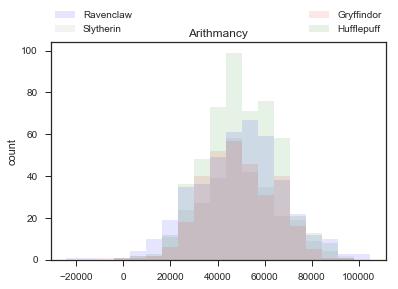

In [138]:
Ravenclaw = Ravenclaw[~np.isnan(Ravenclaw)]
Slytherin = Slytherin[~np.isnan(Slytherin)]
Gryffindor = Gryffindor[~np.isnan(Gryffindor)]
Hufflepuff = Hufflepuff[~np.isnan(Hufflepuff)]

bins = np.linspace(math.ceil(min(data)),  math.floor(max(data)), 20)


plt.hist(Ravenclaw, bins = bins, alpha=0.1, color = "blue", label="Ravenclaw")
plt.hist(Slytherin, bins = bins, alpha=0.1, color = "gray", label="Slytherin")
plt.hist(Gryffindor, bins = bins, alpha=0.1, color = "red", label="Gryffindor")
plt.hist(Hufflepuff, bins = bins, alpha=0.1, color = "green", label="Hufflepuff")

plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)
# plt.legend((Ravenclaw, Slytherin, Gryffindor, Hufflepuff), ("Ravenclaw", "Slytherin", "Gryffindor", "Hufflepuff"))

plt.title('Arithmancy')
plt.ylabel('count')

plt.show()

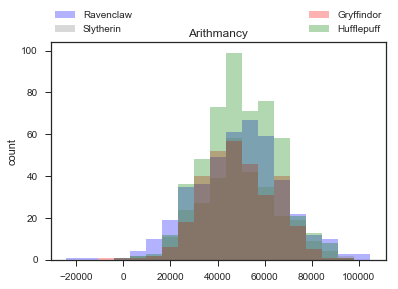

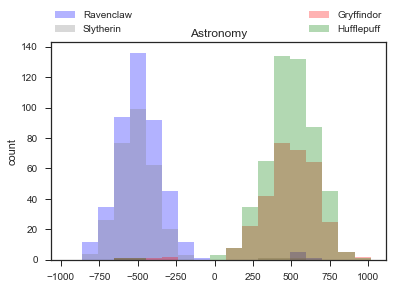

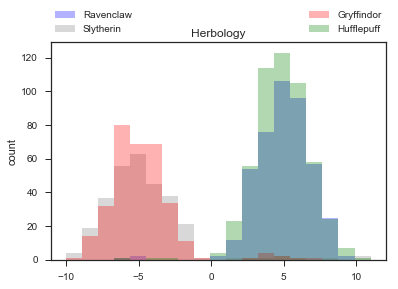

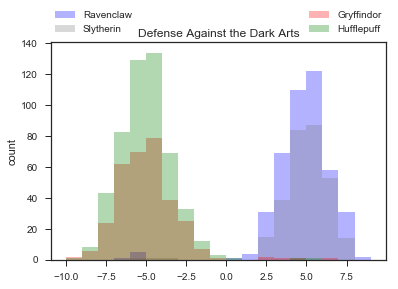

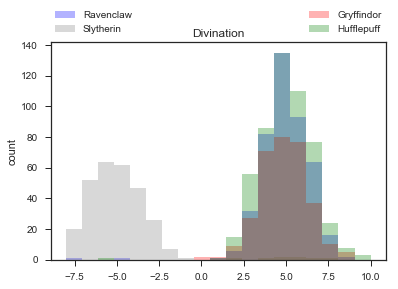

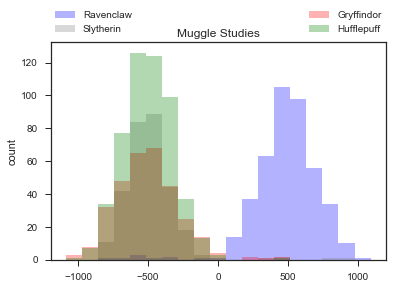

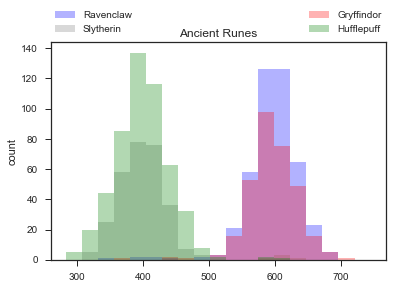

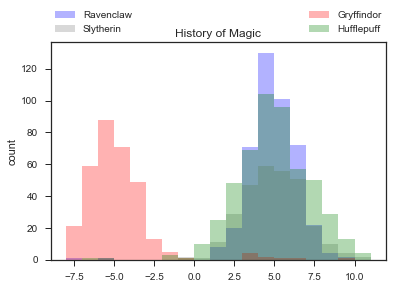

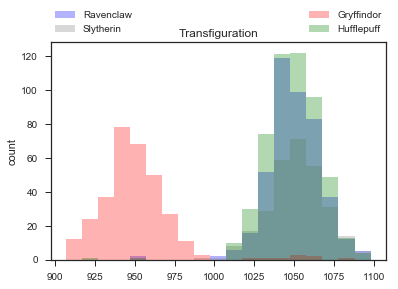

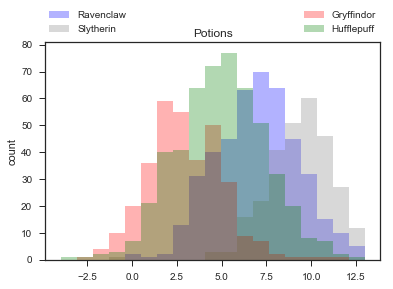

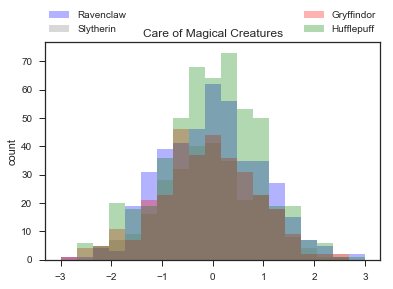

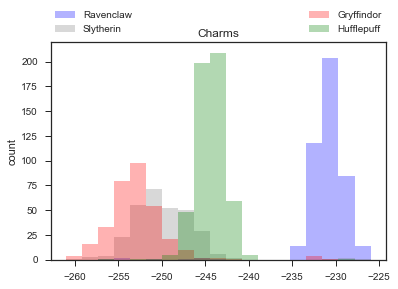

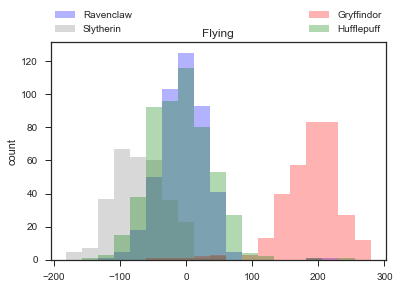

In [162]:
subjects = ["Arithmancy", "Astronomy", "Herbology", "Defense Against the Dark Arts", "Divination", "Muggle Studies", "Ancient Runes", "History of Magic", "Transfiguration", "Potions", "Care of Magical Creatures", "Charms", "Flying"]
for subject in subjects:
    data = np.array(train[subject])
    Ravenclaw = np.array(train[train["Hogwarts House"] == "Ravenclaw"][subject])
    Slytherin = np.array(train[train["Hogwarts House"] == "Slytherin"][subject])
    Gryffindor = np.array(train[train["Hogwarts House"] == "Gryffindor"][subject])
    Hufflepuff = np.array(train[train["Hogwarts House"] == "Hufflepuff"][subject])
    Ravenclaw = Ravenclaw[~np.isnan(Ravenclaw)]
    Slytherin = Slytherin[~np.isnan(Slytherin)]
    Gryffindor = Gryffindor[~np.isnan(Gryffindor)]
    Hufflepuff = Hufflepuff[~np.isnan(Hufflepuff)]
    
    bins = np.linspace(math.ceil(min(data)),  math.floor(max(data)), 20)
    
    plt.hist(Ravenclaw, bins = bins, alpha=0.3, color = "blue", label="Ravenclaw")
    plt.hist(Slytherin, bins = bins, alpha=0.3, color = "gray", label="Slytherin")
    plt.hist(Gryffindor, bins = bins, alpha=0.3, color = "red", label="Gryffindor")
    plt.hist(Hufflepuff, bins = bins, alpha=0.3, color = "green", label="Hufflepuff")

    plt.title(subject)
    plt.ylabel('count')
    plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
               ncol=2, mode="expand", borderaxespad=0.)

    plt.show()
    

#### V.2.2 Scatter plot

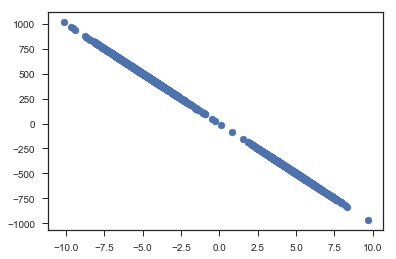

In [163]:
scatter_data = train[["Defense Against the Dark Arts",  "Astronomy"]]
scatter_data = scatter_data.dropna(axis=0, how='any')
x = scatter_data["Defense Against the Dark Arts"]
y = scatter_data["Astronomy"]
plt.scatter(x, y)
plt.show()

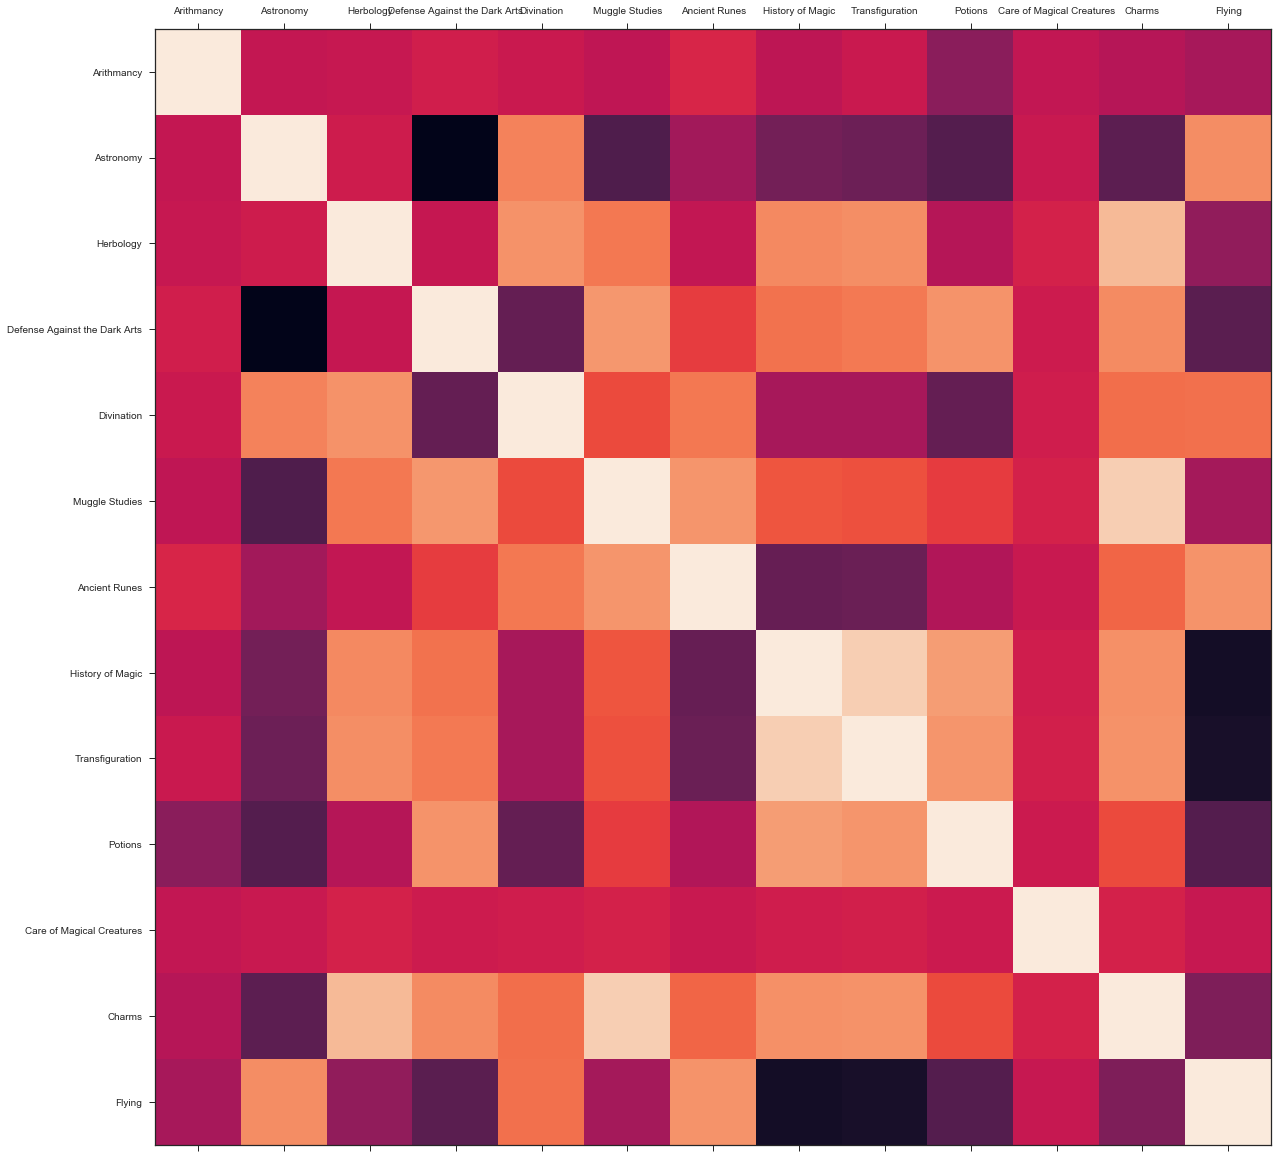

In [179]:
data = train[subjects]
corr = data.corr()
fig, ax = plt.subplots(figsize=(20, 40))
ax.matshow(corr)
plt.xticks(range(len(corr.columns)), corr.columns)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()

In [180]:
abs(data.corr())

,Arithmancy,Astronomy,Herbology,Defense Against the Dark Arts,Divination,Muggle Studies,Ancient Runes,History of Magic,Transfiguration,Potions,Care of Magical Creatures,Charms,Flying
Arithmancy,1.000000,0.033355,0.018613,0.037280,0.003485,0.055085,0.076992,0.069778,0.004673,0.302859,0.042129,0.100896,0.166747
Astronomy,0.033355,1.000000,0.020210,1.000000,0.481663,0.578511,0.192767,0.409449,0.440900,0.558429,0.012876,0.521203,0.523958
Herbology,0.018613,0.020210,1.000000,0.023810,0.549578,0.437113,0.042959,0.510289,0.537615,0.106415,0.047737,0.746614,0.271344
Defense Against the Dark Arts,0.037280,1.000000,0.023810,1.000000,0.479310,0.576553,0.193138,0.409559,0.442231,0.556683,0.010865,0.521115,0.526304
Divination,0.003485,0.481663,0.549578,0.479310,1.000000,0.249272,0.435663,0.170008,0.166173,0.482459,0.023438,0.395282,0.402269
Muggle Studies,0.055085,0.578511,0.437113,0.576553,0.249272,1.000000,0.569814,0.289745,0.266522,0.184076,0.050356,0.847607,0.184862
Ancient Runes,0.076992,0.192767,0.042959,0.193138,0.435663,0.569814,1.000000,0.472979,0.449731,0.122483,0.010400,0.354147,0.559944
History of Magic,0.069778,0.409449,0.510289,0.409559,0.170008,0.289745,0.472979,1.000000,0.849203,0.602211,0.029390,0.539685,0.896283
Transfiguration,0.004673,0.440900,0.537615,0.442231,0.166173,0.266522,0.449731,0.849203,1.000000,0.568442,0.044615,0.549467,0.873673
Potions,0.302859,0.558429,0.106415,0.556683,0.482459,0.184076,0.122483,0.602211,0.568442,1.000000,0.003523,0.248049,0.558594


The two freatures which are similar are Defense Against the Dark Arts and Astronomy. Astronomy is Defense Against the Dark Arts times -100. 
Apart from that, Flying and History of Magic, and  also have a strong negative correlation. Charms and Muggle Studies have strong positive correlation. 

#### V.2.3 Pair plot

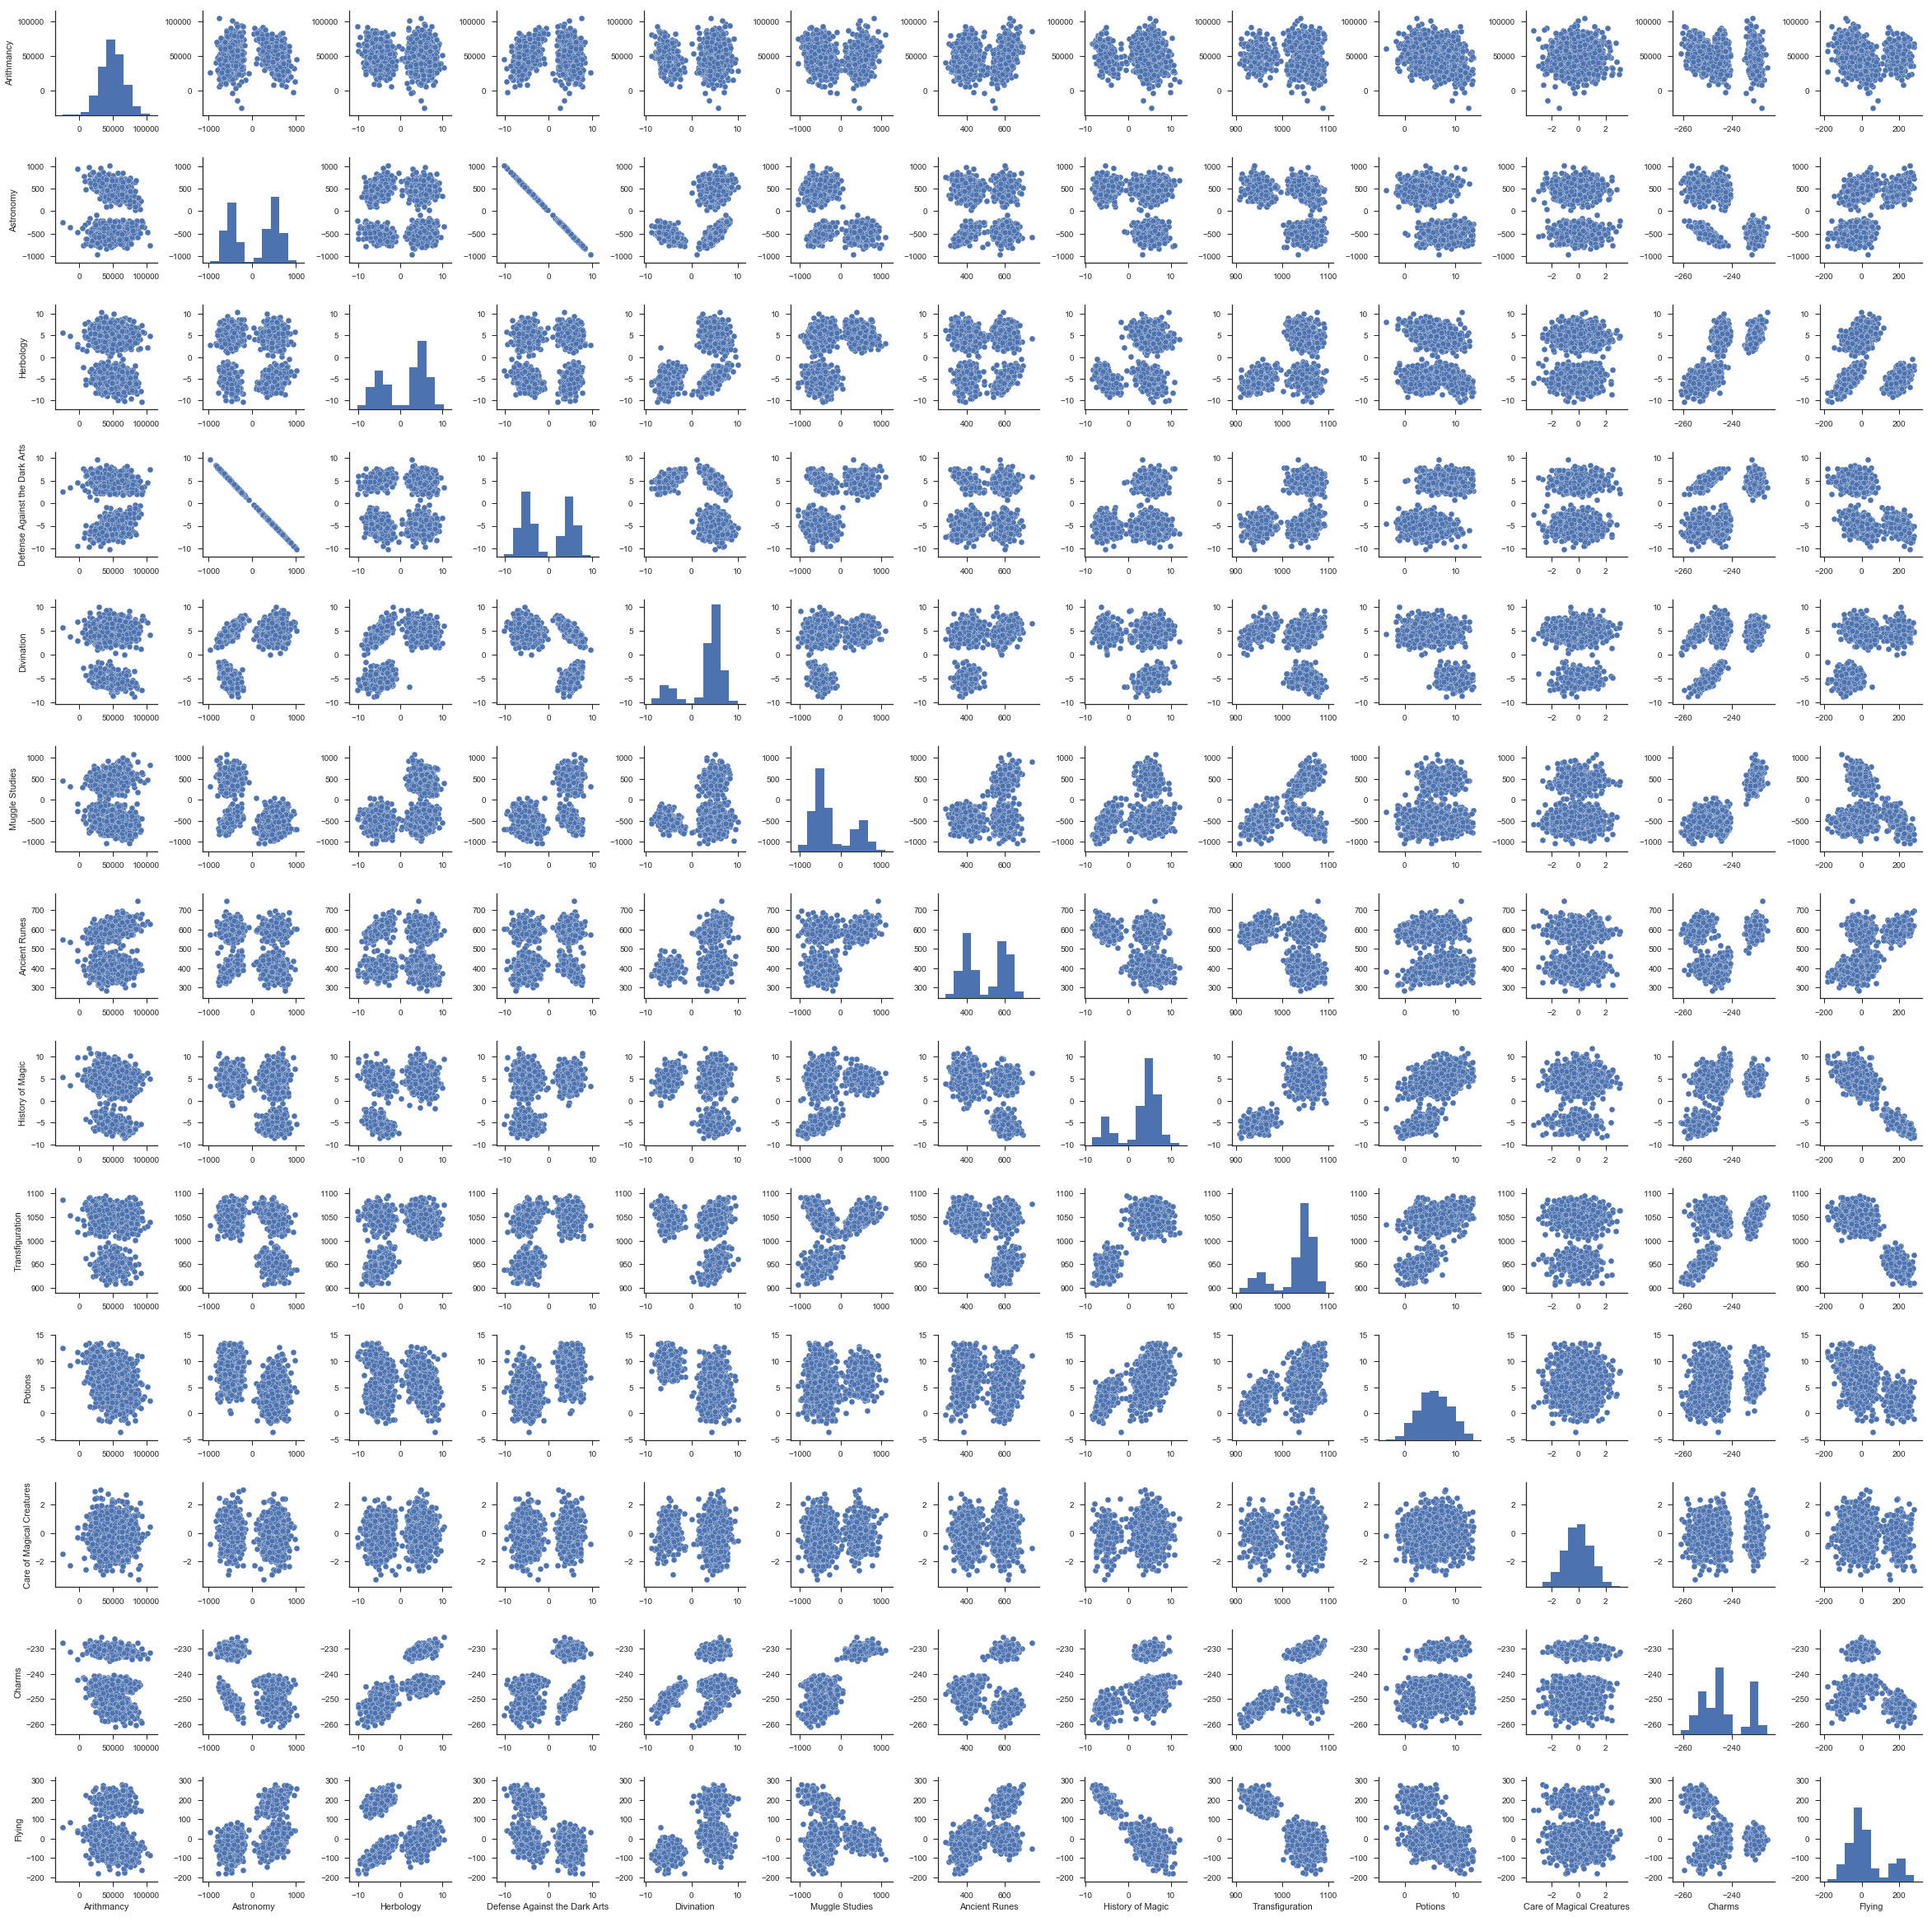

In [181]:
import seaborn as sns
# sns.set(style="ticks")
data = train[subjects]
data = data.dropna(axis=0, how='any')
#plt.subplots(figsize=(40,30))
sns.pairplot(data)
#sns.regplot(x="total_bill", y="tip", data=data)
plt.show()

### V.3 Logistic Regression

#### Just a bit more data exploration

In [182]:
import sklearn.linear_model as sklm ##Includes Logistic Regression, which will be tested for predictive capability
import sklearn.decomposition as skdc ##Includes Principal Component Analysis, a method of dimensionality reduction
import sklearn.pipeline as skpl ##Convenient module for calculating PCs and using them in logistic regression
%matplotlib inline
from subprocess import check_output
import datetime
import copy
import random
import pandas as pd
import numpy as np
import statistics

In [183]:
train = pd.read_csv("resources/dataset_train.csv")
train.drop('Index', axis=1, inplace=True)
train.drop('First Name', axis=1, inplace=True)
train.drop('Last Name', axis=1, inplace=True)
train = train.fillna(train.mean()) # replace the NaN values with the mean of each column
train["birthday_dt"] = pd.to_datetime(train.Birthday)
train["birthday_dt"] = pd.to_timedelta(train.birthday_dt).dt.total_seconds()
train.drop('Birthday', axis=1, inplace=True)
train.head()

,Hogwarts House,Best Hand,Arithmancy,Astronomy,Herbology,Defense Against the Dark Arts,Divination,Muggle Studies,Ancient Runes,History of Magic,Transfiguration,Potions,Care of Magical Creatures,Charms,Flying,birthday_dt
0,Ravenclaw,Left,58384.0,-487.886086,5.727180,4.878861,4.722,272.035831,532.484226,5.231058,1039.788281,3.790369,0.715939,-232.79405,-26.89,954374400.0
1,Slytherin,Right,67239.0,-552.060507,-5.987446,5.520605,-5.612,-487.340557,367.760303,4.107170,1058.944592,7.248742,0.091674,-252.18425,-113.45,939859200.0
2,Ravenclaw,Left,23702.0,-366.076117,7.725017,3.660761,6.140,664.893521,602.585284,3.555579,1088.088348,8.728531,-0.515327,-227.34265,30.42,941587200.0
3,Gryffindor,Left,32667.0,697.742809,-6.497214,-6.977428,4.026,-537.001128,523.982133,-4.809637,920.391449,0.821911,-0.014040,-256.84675,200.64,966643200.0
4,Gryffindor,Left,60158.0,436.775204,-7.820623,-0.387863,2.236,-444.262537,599.324514,-3.444377,937.434724,4.311066,-0.264070,-256.38730,157.98,906854400.0


In [184]:
train.groupby("Hogwarts House").mean()

,Arithmancy,Astronomy,Herbology,Defense Against the Dark Arts,Divination,Muggle Studies,Ancient Runes,History of Magic,Transfiguration,Potions,Care of Magical Creatures,Charms,Flying,birthday_dt
Hogwarts House,,,,,,,,,,,,,,
Gryffindor,49136.104380,487.788762,-4.657073,-4.864328,4.869286,-493.015466,594.768415,-4.624659,952.825020,2.974979,-0.138137,-252.731046,189.024526,9.228009e+08
Hufflepuff,50240.909247,487.320610,4.847983,-4.886143,4.975765,-495.245736,402.496805,4.948376,1049.304591,4.986878,-0.029110,-244.347364,-7.085690,9.234889e+08
Ravenclaw,49451.444341,-469.481996,4.934253,4.724076,4.946495,466.557054,596.138198,4.867469,1049.877458,6.960878,0.002346,-231.080576,-3.979797,9.301639e+08
Slytherin,49379.984789,-483.865763,-4.657685,4.857334,-4.549760,-474.510256,404.310461,4.914403,1051.174387,9.388874,-0.086222,-249.593194,-70.321661,9.219029e+08


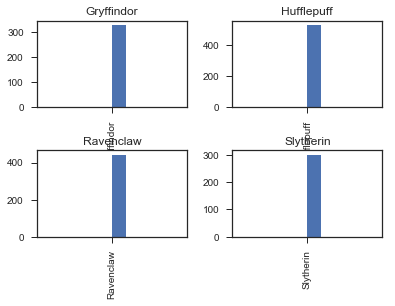

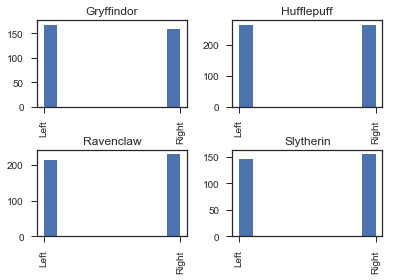

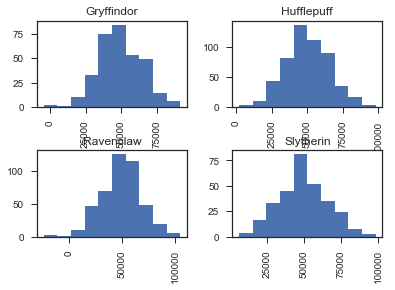

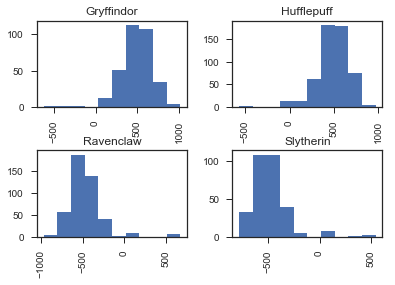

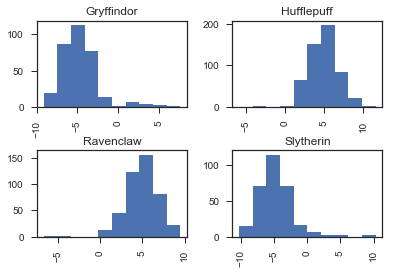

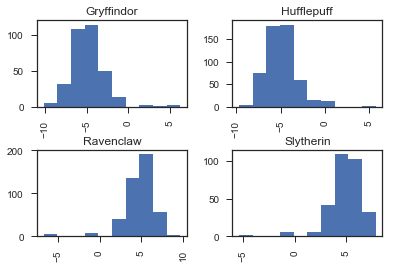

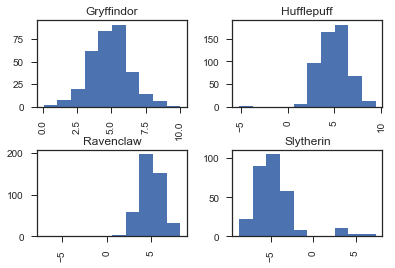

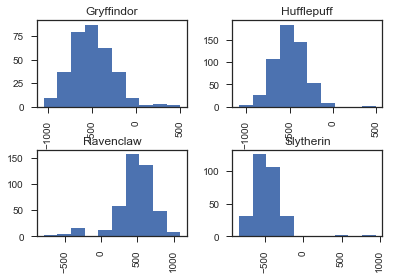

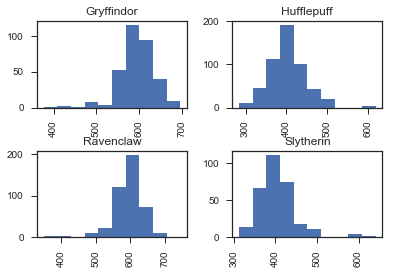

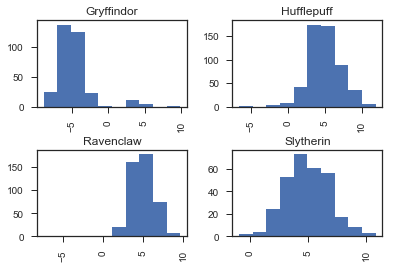

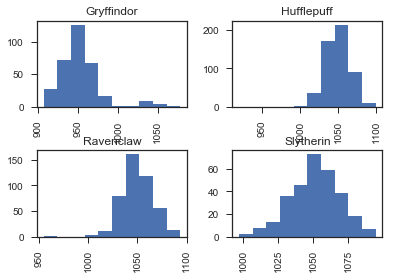

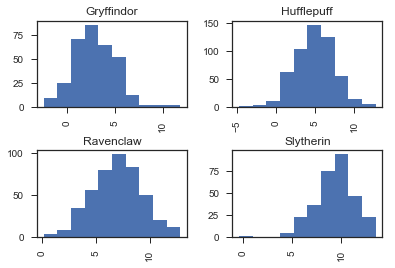

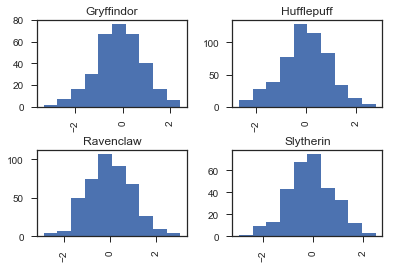

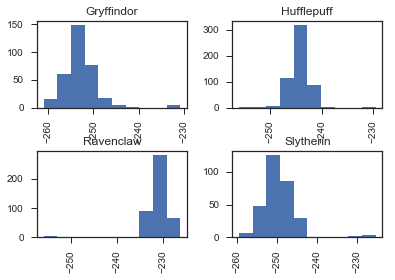

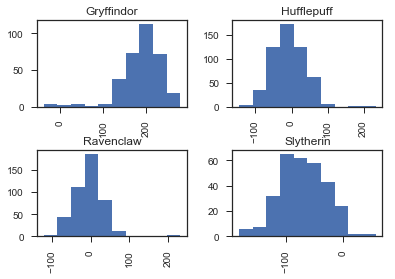

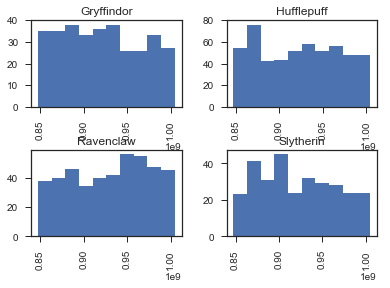

In [185]:
#train.groupby("Hogwarts House")
for colname in list(train):
    train[colname].hist(by=train['Hogwarts House'])

##### Check if our data is imbalanced or not

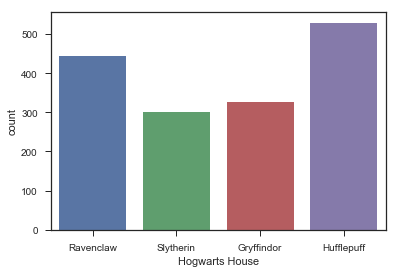

In [186]:
sns.countplot(x = "Hogwarts House", data = train)
plt.show()

It seems more or less a balanced dataset. We don't need to oversample/undersample the training data.

#### feature selection

#### Running PCA for dimentionality reduction

##### normalization

In [187]:
train["Best Hand"] = train["Best Hand"].astype('category')
train["Best Hand"] = train["Best Hand"].cat.codes
train.head()

,Hogwarts House,Best Hand,Arithmancy,Astronomy,Herbology,Defense Against the Dark Arts,Divination,Muggle Studies,Ancient Runes,History of Magic,Transfiguration,Potions,Care of Magical Creatures,Charms,Flying,birthday_dt
0,Ravenclaw,0,58384.0,-487.886086,5.727180,4.878861,4.722,272.035831,532.484226,5.231058,1039.788281,3.790369,0.715939,-232.79405,-26.89,954374400.0
1,Slytherin,1,67239.0,-552.060507,-5.987446,5.520605,-5.612,-487.340557,367.760303,4.107170,1058.944592,7.248742,0.091674,-252.18425,-113.45,939859200.0
2,Ravenclaw,0,23702.0,-366.076117,7.725017,3.660761,6.140,664.893521,602.585284,3.555579,1088.088348,8.728531,-0.515327,-227.34265,30.42,941587200.0
3,Gryffindor,0,32667.0,697.742809,-6.497214,-6.977428,4.026,-537.001128,523.982133,-4.809637,920.391449,0.821911,-0.014040,-256.84675,200.64,966643200.0
4,Gryffindor,0,60158.0,436.775204,-7.820623,-0.387863,2.236,-444.262537,599.324514,-3.444377,937.434724,4.311066,-0.264070,-256.38730,157.98,906854400.0


In [188]:
def standardization(x): #Define function to standardize the data, since all variables are not in the same units
    xmean = np.mean(x) ##calculate mean
    sd = np.std(x) ##calculate standard deviation 
    x_z = (x - xmean) / sd ##calculate standardized value to return
    return(x_z)

In [189]:
##drop response variable and categorical variable, and standardize predictor variables
train_stnd = train.drop(['Hogwarts House', "Best Hand"], 1).apply(standardization,broadcast = True) 
# train_stnd["Best Hand"] = train["Best Hand"]
#train_stnd["year"] = train["year"]
#train_stnd["month"] = train["month"]
#train_stnd["day"] = train["day"]
train_stnd["Best Hand"] = train["Best Hand"]
train_stnd.head()

,Arithmancy,Astronomy,Herbology,Defense Against the Dark Arts,Divination,Muggle Studies,Ancient Runes,History of Magic,Transfiguration,Potions,Care of Magical Creatures,Charms,Flying,birthday_dt,Best Hand
0,0.530385,-1.024817,0.888115,1.020603e+00,0.382179,1.032825,0.349594,0.519639,0.222075,-0.692929,0.802318,1.204930,-0.500486,0.653330,0
1,1.067170,-1.149451,-1.380435,1.144963e+00,-2.136447,-0.546438,-1.217971,0.262132,0.661039,0.416516,0.151316,-1.003297,-1.387362,0.331607,1
2,-1.572018,-0.788249,1.274999,7.845560e-01,0.727777,1.849844,1.016698,0.135751,1.328864,0.891232,-0.481683,1.825755,0.086700,0.369907,0
3,-1.028564,1.277801,-1.479153,-1.276948e+00,0.212548,-0.649717,0.268685,-1.780900,-2.513885,-1.645209,0.041074,-1.534279,1.830738,0.925263,0
4,0.637924,0.770974,-1.735432,1.075714e-17,-0.223715,-0.456850,0.985667,-1.468090,-2.123341,-0.525889,-0.219665,-1.481955,1.393652,-0.399930,0


#### Prepare predictors and target values

In [190]:
X = train_stnd #store predictor variables
y = train['Hogwarts House'] #store response variable
pca = skdc.PCA() #empty model space

In [191]:
pcafit = pca.fit_transform(X,y)

In [192]:
var_explained = pca.explained_variance_ratio_ #ratio of variance each PC explains
print(pd.Series(var_explained))

0     0.346751
1     0.194229
2     0.149285
3     0.082687
4     0.069833
5     0.069448
6     0.030628
7     0.017558
8     0.015155
9     0.010485
10    0.009738
11    0.001501
12    0.001463
13    0.000743
14    0.000497
dtype: float64


In [193]:
for i in range(len(var_explained)):
    var_total = sum(var_explained[0:i])
    if var_total > 0.9:
        pca_n = i
        break
    else:
        continue
pca_n

6

In [194]:
print(sum(var_explained[0:pca_n]))

0.912232529608


Taking the first six PCAs yields to explaining more than 90% of the variances of the original dataset. Therefore we just keep the first six PCAs for a logistic regression. 

In [195]:
pca_data = pd.DataFrame(pcafit).iloc[:,0:pca_n]

In [196]:
pca_data['Hogwarts House'] = train.reset_index()['Hogwarts House']
pca_data.head()

,0,1,2,3,4,5,Hogwarts House
0,-1.730427,-1.591346,-0.143109,-0.805879,0.081280,1.062924,Ravenclaw
1,-1.430306,3.130497,-1.198094,-1.334991,0.144872,0.651074,Slytherin
2,-2.513358,-2.493750,-0.233755,1.511292,0.596065,-0.676330,Ravenclaw
3,4.681669,0.013367,-0.917009,0.915325,0.902560,0.475326,Gryffindor
4,3.314826,0.351048,-2.086782,-0.437052,-0.341566,-0.156114,Gryffindor


In [197]:
# make Ravenclaw_orNot column
pca_data.loc[pca_data["Hogwarts House"] == "Ravenclaw", "Ravenclaw_orNot"] = 1
pca_data.loc[pca_data["Ravenclaw_orNot"] != 1.0, "Ravenclaw_orNot"] = 0
pca_data["Ravenclaw_orNot"] = pca_data["Ravenclaw_orNot"].astype('category').apply(int) 

# make Slytherin_orNot column
pca_data.loc[pca_data["Hogwarts House"] == "Slytherin", "Slytherin_orNot"] = 1
pca_data.loc[pca_data["Slytherin_orNot"] != 1.0, "Slytherin_orNot"] = 0
pca_data["Slytherin_orNot"] = pca_data["Slytherin_orNot"].astype('category').apply(int) 

# make Gryffindor_orNot column
pca_data.loc[pca_data["Hogwarts House"] == "Gryffindor", "Gryffindor_orNot"] = 1
pca_data.loc[pca_data["Gryffindor_orNot"] != 1.0, "Gryffindor_orNot"] = 0
pca_data["Gryffindor_orNot"] = pca_data["Gryffindor_orNot"].astype('category').apply(int) 

# make Hufflepuff_orNot column
pca_data.loc[pca_data["Hogwarts House"] == "Hufflepuff", "Hufflepuff_orNot"] = 1
pca_data.loc[pca_data["Hufflepuff_orNot"] != 1.0, "Hufflepuff_orNot"] = 0
pca_data["Hufflepuff_orNot"] = pca_data["Hufflepuff_orNot"].astype('category').apply(int) 

pca_data.head()

,0,1,2,3,4,5,Hogwarts House,Ravenclaw_orNot,Slytherin_orNot,Gryffindor_orNot,Hufflepuff_orNot
0,-1.730427,-1.591346,-0.143109,-0.805879,0.081280,1.062924,Ravenclaw,1,0,0,0
1,-1.430306,3.130497,-1.198094,-1.334991,0.144872,0.651074,Slytherin,0,1,0,0
2,-2.513358,-2.493750,-0.233755,1.511292,0.596065,-0.676330,Ravenclaw,1,0,0,0
3,4.681669,0.013367,-0.917009,0.915325,0.902560,0.475326,Gryffindor,0,0,1,0
4,3.314826,0.351048,-2.086782,-0.437052,-0.341566,-0.156114,Gryffindor,0,0,1,0


### Run logistic regression

It's a multinominal regression model classifying each observation into four categories. This multinominal logistic regression model consists of four logistic regression submodels each of which returns the probability of classifying into one house against other three. And we compare the probabilities of four submodels and choose the one with the highest probability.

#### Defining functions for logistic regression 

The logit function for logistic regression is defined as

$$P(G = k | X = x) = \frac{1}{1 + \exp(\beta_{0} + \beta_{1}^Tx)} = p_k(x;\theta)$$

where $\theta$ is a parameter set $$\theta = \{\beta_{0}, \beta_{1}\}$$

Here $k = \{0,1\}$

In [198]:
def sigmoid(scores):
    return 1 / (1 + np.exp(-scores))

The log-likelihood for N obseravtion in case of binary logistic regression is 

$$l(\beta) = \sum_{i=1}^{N}[y_i\log{p(x_i;\beta)} + (1-y_i)\log{\{1-p(x_i;\beta)\}}] $$
$$= \sum_{i=1}^{N}\{ y_i\beta^Tx_i - \log{(1+\exp{\beta^Tx_i)}}\}$$
where $$\beta = \{\beta_{0}, \beta_{1}\}$$

The objective is to find the parameters which maximizes the log-likelihood. It is equivalent to find the parameters which minimizes the cross-entropy cost function 
$$CE = J(\theta) = \frac{1}{m}(-y^T\log{(P)} - (1-y)^T\log{(1-P)})$$
where $$P = p(X\beta)$$

In [199]:
def log_likelihood(features, target, weights):
    scores = np.dot(features, weights)
    ll = np.sum( target*scores - np.log(1 + np.exp(scores)) )
    return ll

The logit function to fit the observations are obtained by following steps in gradient descent method:

1. start with some random parameter value (here we start with all the parameters = 0)
2. take a derivative of log-likelihood to find the slope, and get parameters that increase the likelihood
3. update the logit function with new parameters obtained in step 2.
4. iterate 1~3 until we obtain stable likelihood value(where we reach local maxima)

The derivative of log-likelihood is 
$$\frac{\delta l(\beta)}{\delta\beta} = X^T(y - s(z))$$
where $$s(z) = \frac{1}{1 + \exp(\beta_{0} + \beta_{1}^Tx)}$$ the sigmoid function.

In [200]:
def logistic_regression(features, target, num_steps, learning_rate, add_intercept = False):
    if add_intercept:
        intercept = np.ones((features.shape[0], 1))
        features = np.hstack((intercept, features))
        
    # start with all the parameters = 0
    weights = np.zeros(features.shape[1])
    
    for step in range(num_steps):
        #print(step)
        scores = np.dot(features, weights)
        predictions = sigmoid(scores)

        # Update weights with gradient
        output_error_signal = target - predictions
        gradient = np.dot(features.T, output_error_signal)
        weights += learning_rate * gradient
        
        # Print log-likelihood every so often
        if step % 10000 == 0:
            print(log_likelihood(features, target, weights))
        
    return weights

#### Prepare data for k-fold Cross Validation

##### choice of k

Choice of k is normally 5-10. We choose 5 as our dataset would not be large enough if we split it into more than 5 datasets.

In [203]:
pred_res = {} # a big storage for prediction result on validation for all the CV folds
weight_res = {} # a big storage for weights parameters
acc_res = {} # a storage for accuracy rates

k = 5 # number of folds for CV
rows = pca_data.shape[0]

dct = {'Ravenclaw_orNot': "Ravenclaw",
       'Slytherin_orNot': "Slytherin",
       'Gryffindor_orNot': "Gryffindor",
       'Hufflepuff_orNot': "Hufflepuff"}

for i in range(k): # try k-times for k-fold CV
    print("Now executing fold", i + 1)
    
    pred_res_fold = [] # storage for prediction result on validation
    weight_houses = {} # storage for weight results on validation
    
    if i == 0:
        val_index = range(0, int(rows/k*(i+1)))
        # validation data for CV
        validation_pca_data = pca_data.iloc[0:int(rows/k*(i+1))] 
        # label for validation data
        validation_pca_label = validation_pca_data['Hogwarts House'] 
        # train data for CV
        train_pca_data = pca_data[~pca_data.index.isin(val_index)] 
    else:
        val_index = range(int(rows/k*(i))+1, int(rows/k*(i+1)))
        # validation data for CV
        validation_pca_data = pca_data.iloc[int(rows/k*(i))+1:int(rows/k*(i+1))] 
        # label for validation data
        validation_pca_label = validation_pca_data['Hogwarts House'] 
        # train data for CV
        train_pca_data = pca_data[~pca_data.index.isin(val_index)] 
    
    # we build 4 logistic regression sub models 
    # and compare the probabilities
    for house in ["Ravenclaw_orNot", 
                  "Slytherin_orNot", 
                  "Gryffindor_orNot", 
                  "Hufflepuff_orNot"]:
        # train data 
        X_pca = train_pca_data.iloc[:,0:pca_n].as_matrix(columns=None) 
        # label of train data
        y_pca = train_pca_data[house].as_matrix(columns=None) 
        # validation data
        X_val_pca = validation_pca_data.iloc[:,0:pca_n].as_matrix(columns=None) 
        # label of validation data for each house
        y_val_pca = validation_pca_data[house].as_matrix(columns=None) 
        
        # training
        weights = logistic_regression(X_pca, y_pca, 
                                      num_steps = 30000, 
                                      learning_rate = 5e-5, 
                                      add_intercept=True)
        
        # store weights data for predicting on test data
        weight_houses["{0}".format(house)] = weights 
        
        """ # this part is not necessary
        #weight_houses["weight_" + str(house)] = weights  
        data_with_intercept = np.hstack((np.ones((X_pca.shape[0], 1)),
                                         X_pca))
        final_scores = np.dot(data_with_intercept, weights)
        preds = np.round(sigmoid(final_scores))
        # print("accuracy rate for " + house + " on training is " \
        # + format((preds == y_pca).sum().astype(float) / len(preds)))
        """
        
        # validation
        val_data_with_intercept = np.hstack((np.ones((X_val_pca.shape[0], 1)),
                                             X_val_pca))
        val_final_scores = np.dot(val_data_with_intercept, weights)
        # val_preds = np.round(sigmoid(val_final_scores))
        # print("accuracy rate for " + house + " on validation is " \
        # + format((val_preds == y_val_pca).sum().astype(float) / len(val_preds)))
        
        val_preds = pd.DataFrame(sigmoid(val_final_scores))
        val_preds.columns = [house]
        pred_res_fold.append(val_preds)

    pred_res_fold = pd.concat(pred_res_fold, axis=1)
    
    # create a column with a name of the house with the highest probability
    pred_res_fold["predicted_house"] = pred_res_fold.idxmax(axis=1)
    pred_res_fold= pred_res_fold.assign(predicted_house = pred_res_fold.predicted_house.map(dct))
    pred_res_fold["label"] = validation_pca_label.reset_index()['Hogwarts House']
    
    # check the accuracy
    acc = len(pred_res_fold[pred_res_fold.predicted_house == pred_res_fold.label]) / len(pred_res_fold)
    print("Accuracy rate for fold", i + 1, "is", acc)
    
    # storing the results
    pred_res["pred_res_" + "fold_" + str(i + 1)] = pred_res_fold
    weight_res["weight_fold_" + str(i + 1)] = weight_houses
    fold_name = "fold" + str(int(i+1))
    acc_res[fold_name] = acc

numbers = [acc_res[key] for key in acc_res]
mean_ = statistics.mean(numbers)
print("Average accuracy rate is ", mean_)

Now executing fold 1
-833.215989324
-88.0403500361
-88.0401369571
-849.082766385
-62.5403362639
-62.5275540022
-830.273896701
-69.6563390489
-69.64361311
-850.32586065
-84.3933113454
-84.3928942647
Accuracy rate for fold 1 is 0.990625
Now executing fold 2
-834.024579624
-74.114033082
-74.1067732262
-848.189360362
-67.9559500924
-67.9445067813
-830.273176648
-58.1206442075
-58.0911057731
-851.6293655
-79.3020621947
-79.3009677939
Accuracy rate for fold 2 is 0.9811912225705329
Now executing fold 3
-833.44473183
-90.7304550715
-90.7303906057
-849.995355657
-59.0416838341
-59.0104704523
-830.697469389
-60.0147249662
-59.9971493084
-849.972740896
-64.2509148961
-64.2341924028
Accuracy rate for fold 3 is 0.9780564263322884
Now executing fold 4
-833.761711191
-96.9303756035
-96.9302943599
-849.687372034
-66.1119559969
-66.0849549017
-830.100786423
-54.9086747132
-54.8759441519
-850.622036234
-71.2418964904
-71.2328882052
Accuracy rate for fold 4 is 0.987460815047022
Now executing fold 5
-833.

In [204]:
for key, value in acc_res.items():
    if value == max(acc_res.values()):
        ind = list(acc_res.keys()).index(key)
ind

0

The 1st fold yielded the best accuracy rate. 

In [205]:
best_weight = list(weight_res.values())[ind]
best_weight

{'Gryffindor_orNot': array([-3.52934504,  1.64318928, -0.74939475, -1.08975622,  0.86700695,
        -0.21709654, -0.14180332]),
 'Hufflepuff_orNot': array([-2.24949422,  0.31969933,  0.49834166,  3.16032885, -0.17387664,
        -0.06636997, -0.16178321]),
 'Ravenclaw_orNot': array([-2.67149802, -1.18300312, -1.89149097, -0.81030679, -0.19593262,
         0.33595545,  0.12427833]),
 'Slytherin_orNot': array([-3.77705969, -0.99198574,  2.15088835, -1.06269565, -0.37679516,
        -0.03464031,  0.06384315])}

### Prediction on test data

#### PCA

In [206]:
test = pd.read_csv("resources/dataset_test.csv")
test.head()

,Index,Hogwarts House,First Name,Last Name,Birthday,Best Hand,Arithmancy,Astronomy,Herbology,Defense Against the Dark Arts,Divination,Muggle Studies,Ancient Runes,History of Magic,Transfiguration,Potions,Care of Magical Creatures,Charms,Flying
0,0,NaN,Rico,Sargent,2001-10-06,Right,41642.0,696.096071,3.020172,-6.960961,7.996,-365.151850,393.138185,4.207691,1046.742736,3.668983,0.373853,-244.48172,-13.62
1,1,NaN,Tamara,Shackelford,1998-01-08,Left,45352.0,-370.844655,2.965226,3.708447,6.349,522.580486,602.853051,6.460017,1048.053878,8.514622,0.577432,-231.29200,-26.26
2,2,NaN,Staci,Crandall,1998-09-15,Left,43502.0,320.303990,-6.185697,-3.203040,4.619,-630.073207,588.071795,-5.565818,936.437358,1.850829,-1.647150,-252.99343,200.15
3,3,NaN,Dee,Gavin,2001-05-10,Right,61831.0,407.202928,4.962442,NaN,NaN,-449.179806,427.699966,NaN,1043.397718,4.656573,1.164708,-244.01660,-11.15
4,4,NaN,Gregory,Gustafson,1999-02-01,Right,NaN,288.337747,3.737656,-2.883377,4.886,-449.732166,385.712782,2.876347,1051.377936,2.750586,0.102104,-243.99806,-7.12


In [207]:
test.drop('Index', axis=1, inplace=True)
test.drop('First Name', axis=1, inplace=True)
test.drop('Last Name', axis=1, inplace=True)
test = test.fillna(test.mean())
test["birthday_dt"] = pd.to_datetime(test.Birthday)
test["birthday_dt"] = pd.to_timedelta(test.birthday_dt).dt.total_seconds()
test.drop('Birthday', axis=1, inplace=True)
test["Best Hand"] = test["Best Hand"].astype('category')
test["Best Hand"] = test["Best Hand"].cat.codes
test_stnd = test.drop(['Hogwarts House', "Best Hand"], 1).apply(standardization,broadcast = True) 
test_stnd["Best Hand"] = test["Best Hand"]
test_stnd.head()

,Arithmancy,Astronomy,Herbology,Defense Against the Dark Arts,Divination,Muggle Studies,Ancient Runes,History of Magic,Transfiguration,Potions,Care of Magical Creatures,Charms,Flying,birthday_dt,Best Hand
0,-5.557378e-01,1.286903,0.328317,-1.269178e+00,1.188731e+00,-0.295413,-1.022805,3.240565e-01,0.355048,-0.664301,0.348263,-0.149216,-0.389068,1.764672,1
1,-3.116518e-01,-0.832194,0.317281,8.390469e-01,7.617148e-01,1.513413,1.063759,8.537717e-01,0.384405,0.862810,0.550332,1.364013,-0.522027,-0.920950,0
2,-4.333658e-01,0.540526,-1.520663,-5.266305e-01,3.131789e-01,-0.835212,0.916692,-1.974534e+00,-2.114761,-1.237296,-1.657741,-1.125747,1.859560,-0.429798,0
3,7.725240e-01,0.713120,0.718418,-2.193749e-17,-1.151387e-16,-0.466627,-0.678932,2.088869e-16,0.280150,-0.353061,1.133250,-0.095854,-0.363086,1.471945,1
4,-4.786952e-16,0.477037,0.472422,-4.634667e-01,3.824038e-01,-0.467752,-1.096685,1.094332e-02,0.458833,-0.953736,0.078532,-0.093727,-0.320695,-0.156717,1


In [208]:
X_test = test_stnd #store predictor variables
y_test = test['Hogwarts House'] #store response variable
pca_test = skdc.PCA() #empty model space
pd.DataFrame(X_test).head()

,Arithmancy,Astronomy,Herbology,Defense Against the Dark Arts,Divination,Muggle Studies,Ancient Runes,History of Magic,Transfiguration,Potions,Care of Magical Creatures,Charms,Flying,birthday_dt,Best Hand
0,-5.557378e-01,1.286903,0.328317,-1.269178e+00,1.188731e+00,-0.295413,-1.022805,3.240565e-01,0.355048,-0.664301,0.348263,-0.149216,-0.389068,1.764672,1
1,-3.116518e-01,-0.832194,0.317281,8.390469e-01,7.617148e-01,1.513413,1.063759,8.537717e-01,0.384405,0.862810,0.550332,1.364013,-0.522027,-0.920950,0
2,-4.333658e-01,0.540526,-1.520663,-5.266305e-01,3.131789e-01,-0.835212,0.916692,-1.974534e+00,-2.114761,-1.237296,-1.657741,-1.125747,1.859560,-0.429798,0
3,7.725240e-01,0.713120,0.718418,-2.193749e-17,-1.151387e-16,-0.466627,-0.678932,2.088869e-16,0.280150,-0.353061,1.133250,-0.095854,-0.363086,1.471945,1
4,-4.786952e-16,0.477037,0.472422,-4.634667e-01,3.824038e-01,-0.467752,-1.096685,1.094332e-02,0.458833,-0.953736,0.078532,-0.093727,-0.320695,-0.156717,1


In [209]:
pcafit_test = pca_test.fit_transform(X_test, y_test)
var_explained_test = pca_test.explained_variance_ratio_

for i in range(len(var_explained_test)):
    var_total = sum(var_explained_test[0:i])
    if var_total > 0.9:
        pca_n_test = i
        break
    else:
        continue

pca_n_test

6

In [210]:
pca_data_test = pd.DataFrame(pcafit_test).iloc[:,0:pca_n_test]
pca_data_test.head()

,0,1,2,3,4,5
0,0.777859,0.565320,-2.331824,-0.324158,1.256196,-1.139555
1,-2.291014,-1.895994,0.403900,-0.524618,0.125421,0.728123
2,3.982389,-0.802268,1.607060,-0.126481,-1.409280,-0.830468
3,0.073076,0.777955,-1.244947,0.961774,1.562459,-0.160547
4,0.355395,0.571614,-1.452583,0.065172,-0.203042,0.419440


In [211]:
X_pca_test = pca_data_test.as_matrix(columns=None)
X_pca_test

array([[ 0.77785925,  0.56531959, -2.33182419, -0.32415781,  1.25619624,
        -1.13955478],
       [-2.29101397, -1.89599445,  0.40390022, -0.52461808,  0.1254213 ,
         0.72812257],
       [ 3.98238879, -0.80226795,  1.60706043, -0.12648079, -1.40927954,
        -0.83046791],
       ..., 
       [ 0.00532242,  0.95465227, -1.47995995,  0.32923525, -2.20923482,
        -0.7914288 ],
       [-2.98489288, -2.02785353,  0.55271938,  0.57529365, -0.80116152,
        -0.2359513 ],
       [-1.00082874, -1.1585939 , -0.54719459,  0.5935047 ,  0.71649086,
         0.63746694]])

#### Prediction

In [212]:
test_res = []
for house in best_weight.keys():
    data_with_intercept = np.hstack((np.ones((X_pca_test.shape[0], 1)), X_pca_test))
    final_scores = np.dot(data_with_intercept, best_weight[house])
    preds = sigmoid(final_scores)
    preds = pd.DataFrame(preds)
    preds.columns = [house]
    test_res.append(preds)
    
test_res = pd.concat(test_res, axis=1)
test_res.head()

,Ravenclaw_orNot,Slytherin_orNot,Gryffindor_orNot,Hufflepuff_orNot
0,0.081093,0.299674,0.371480,0.000132
1,0.971617,0.003104,0.001008,0.063851
2,0.000444,0.000015,0.898296,0.981157
3,0.051950,0.217546,0.107345,0.002429
4,0.046311,0.206325,0.148090,0.001490


In [213]:
test_res["predicted_house"] = test_res.idxmax(axis=1)
dct = {'Ravenclaw_orNot': "Ravenclaw",
       'Slytherin_orNot': "Slytherin",
       'Gryffindor_orNot': "Gryffindor",
       'Hufflepuff_orNot': "Hufflepuff"}
test_res= test_res.assign(predicted_house = test_res.predicted_house.map(dct))
test_res.head()

,Ravenclaw_orNot,Slytherin_orNot,Gryffindor_orNot,Hufflepuff_orNot,predicted_house
0,0.081093,0.299674,0.371480,0.000132,Gryffindor
1,0.971617,0.003104,0.001008,0.063851,Ravenclaw
2,0.000444,0.000015,0.898296,0.981157,Hufflepuff
3,0.051950,0.217546,0.107345,0.002429,Slytherin
4,0.046311,0.206325,0.148090,0.001490,Slytherin
